# Dynamic Movement Primitives

This is a tutorial on how to use Dynamic Movement Primitives package DMP. 

In [2]:
# To check the files of the parent folder
import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [3]:
# Numpy package needed for DMP calculations
import numpy as np

# To visualize data
import matplotlib.pyplot as plt

# Dynamic Movement Primitives 
from DMP import DMP



## Create Trajectories

In [4]:
# Create trajectories to encode in DMP
data_length = 500
duration = 10.0

time = np.reshape(np.linspace(0, duration, num = data_length) , (data_length,1) )

# You can play around with the trajectories
x = np.cos(time)
y = -0.003*(time**3) -0.005*(time**2) +0.001*time
z = np.sin(0.5*time)+x +y

dataset = np.concatenate((time,x,y,z), axis = 1)

# Degrees of freedom for DMP ( 3 trajectories, 3 DoF here)
DoF = dataset[0,1:].shape[0]

## Learn Weights

In [5]:
# Choose the basis function number
bf_number = 20

# Choose the spring constant
K = 1000*np.ones(DoF) # Flexibility to set different K for different DoFs

# Initialize DMP and learn the weights
dmp = DMP(bf_number, K, 1, dataset)

# You can access the weights by 
weights = dmp.getWeights()

# Weight Matrix has a shape (bf_number*DoF) = (20*3)
# print weights

## Plot Basis Functions

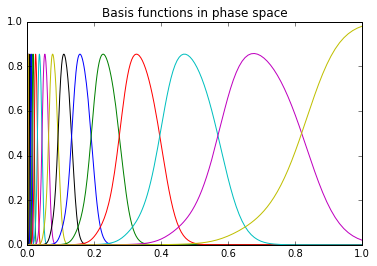

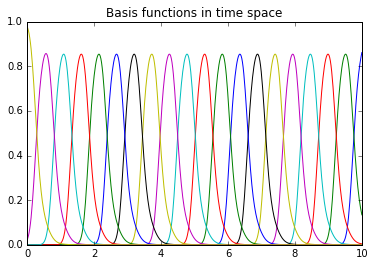

In [6]:
dmp.plot_basis_functions()

## Example 1 : Same parameters as the demonstration        


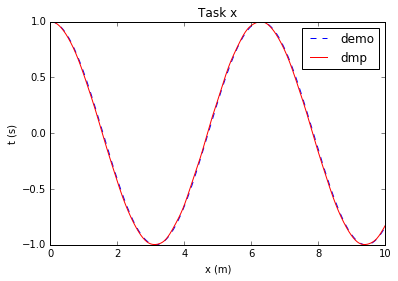

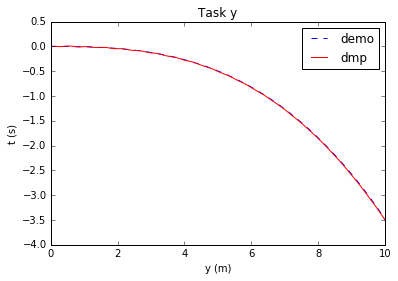

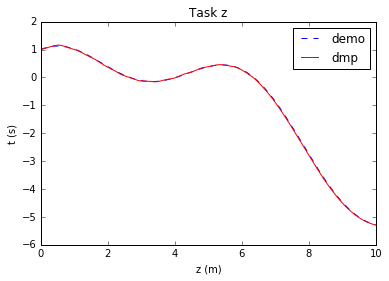

In [7]:
# Set your desired duration
des_tau = duration

# Set your initial and goal parameters 
x0 = dataset[ 0,1:]  
g0 = dataset[-1,1:]

# Set force feedback to zero for this example
zeta = 0 # force feedback at

# Set delta time for numerical differentiation 
dt = duration/data_length

# Initialize current position and velocities ( e.g. move the arm to the initial position )
current_pos = x0 
current_vel = np.zeros(DoF)  # Initially the robot arm is at rest


plot_position = np.zeros(3)
t = 0 
i = 0 ## burayi da duzelt
while t <= des_tau : 

    # Execute  DMP
    desired_pos, desired_vel  = dmp.executeDMP(t, dt, des_tau, x0, g0, current_pos,current_vel,zeta)
    
    # Execute the robot arm to the desired position with desired velocities
    current_pos = desired_pos
    current_vel = desired_vel
    
    # Store the current positions
    plot_position = np.row_stack((plot_position, current_pos))

    i += 1 ## plot_positiondan alabiliriz
    t += dt


# If des_tau changed, plotting time may change
plot_time = np.linspace(0,des_tau, i) 

taskNames = ["Task x", "Task y", 'Task z']
DoF_names = ["x", "y", "z"]
for i in range(DoF):
    plt.figure(taskNames[i])
    plt.plot(time,dataset[:,i+1],linestyle='--',label = "demo")
    plt.plot(plot_time,plot_position[1:,i],color = 'r', label = 'dmp')
    plt.title(taskNames[i])
    plt.xlabel(DoF_names[i]+" (m)")
    plt.ylabel("t (s)")
    plt.legend()
plt.show()

## Example 2 : Change initial positions - spatial invariance

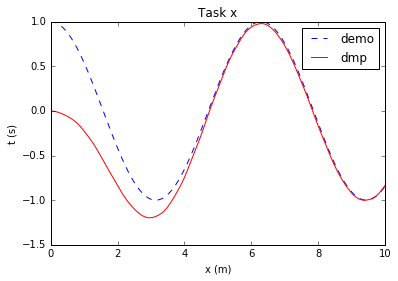

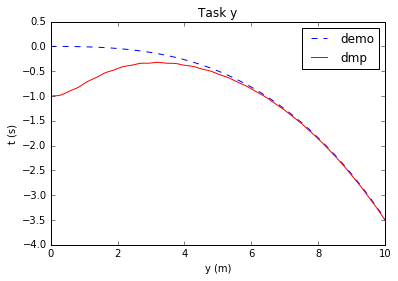

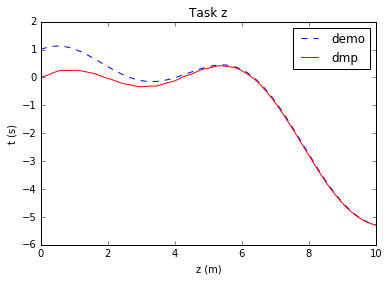

In [8]:
# Set your desired duration
des_tau = duration

# Set your initial and goal parameters 
x0 = dataset[ 0,1:]  - np.ones(3) # We decrease the initial positions 1 m for every DoF
g0 = dataset[-1,1:]

# Set force feedback to zero for this example
zeta = 0

# Set delta time for numerical differentiation 
dt = duration/data_length

# Initialize current position and velocities ( e.g. move the arm to the initial position )
current_pos = x0 
current_vel = np.zeros(DoF)  # Initially the robot arm is at rest


plot_position = np.zeros(3)
t = 0 
i = 0
while t <= des_tau : 

    # Execute  DMP
    desired_pos, desired_vel  = dmp.executeDMP(t, dt, des_tau, x0, g0, current_pos,current_vel,zeta)
    
    # Execute the robot arm to the desired position with desired velocities
    current_pos = desired_pos
    current_vel = desired_vel
    
    # Store the current positions
    plot_position = np.row_stack((plot_position, current_pos))

    i += 1
    t += dt


# If des_tau changed, plotting time may change
plot_time = np.linspace(0,des_tau, i) 

taskNames = ["Task x", "Task y", 'Task z']
DoF_names = ["x", "y", "z"]
for i in range(DoF):
    plt.figure(taskNames[i])
    plt.plot(time,dataset[:,i+1],linestyle='--',label = "demo")
    plt.plot(plot_time,plot_position[1:,i],color = 'r', label = 'dmp')
    plt.title(taskNames[i])
    plt.xlabel(DoF_names[i]+" (m)")
    plt.ylabel("t (s)")
    plt.legend()
plt.show()

## Example 3: Change goal positions - spatial invariance

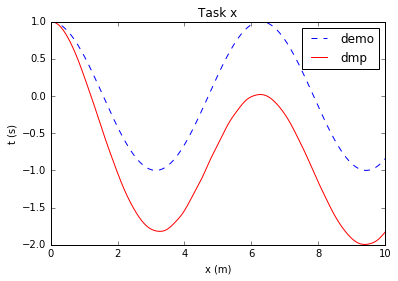

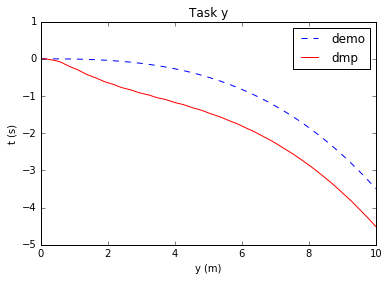

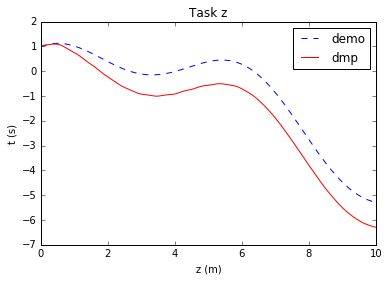

In [9]:
# Set your desired duration
des_tau = duration

# Set your initial and goal parameters 
x0 = dataset[ 0,1:]   
g0 = dataset[-1,1:] - np.ones(3) # We decrease the goal positions 1 m for every DoF

# Set force feedback to zero for this example
zeta = 0

# Set delta time for numerical differentiation 
dt = duration/data_length

# Initialize current position and velocities ( e.g. move the arm to the initial position )
current_pos = x0 
current_vel = np.zeros(DoF)  # Initially the robot arm is at rest


plot_position = np.zeros(3)
t = 0 
i = 0
while t <= des_tau : 

    # Execute  DMP
    desired_pos, desired_vel  = dmp.executeDMP(t, dt, des_tau, x0, g0, current_pos,current_vel,zeta)
    
    # Execute the robot arm to the desired position with desired velocities
    current_pos = desired_pos
    current_vel = desired_vel
    
    # Store the current positions
    plot_position = np.row_stack((plot_position, current_pos))

    i += 1
    t += dt


# If des_tau changed, plotting time may change
plot_time = np.linspace(0,des_tau, i) 

taskNames = ["Task x", "Task y", 'Task z']
DoF_names = ["x", "y", "z"]
for i in range(DoF):
    plt.figure(taskNames[i])
    plt.plot(time,dataset[:,i+1],linestyle='--',label = "demo")
    plt.plot(plot_time,plot_position[1:,i],color = 'r', label = 'dmp')
    plt.title(taskNames[i])
    plt.xlabel(DoF_names[i]+" (m)")
    plt.ylabel("t (s)")
    plt.legend()
plt.show()

## Example 4 : Change desired duration - temporal invariance

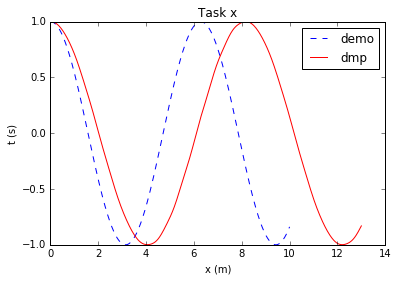

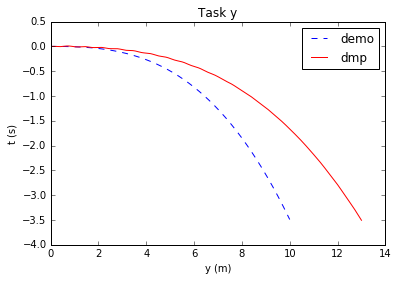

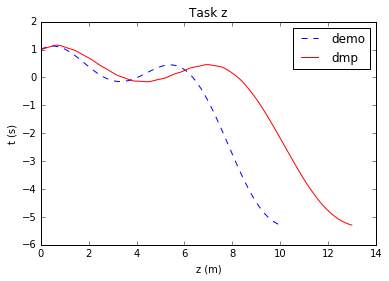

In [10]:
# Set your desired duration
des_tau = duration + 3  #Add 3 more seconds

# Set your initial and goal parameters 
x0 = dataset[ 0,1:]   
g0 = dataset[-1,1:] 

# Set force feedback to zero for this example
zeta = 0

# Set delta time for numerical differentiation 
dt = duration/data_length

# Initialize current position and velocities ( e.g. move the arm to the initial position )
current_pos = x0 
current_vel = np.zeros(DoF)  # Initially the robot arm is at rest


plot_position = np.zeros(3)
t = 0 
i = 0
while t <= des_tau : 

    # Execute  DMP
    desired_pos, desired_vel  = dmp.executeDMP(t, dt, des_tau, x0, g0, current_pos,current_vel,zeta)
    
    # Execute the robot arm to the desired position with desired velocities
    current_pos = desired_pos
    current_vel = desired_vel
    
    # Store the current positions
    plot_position = np.row_stack((plot_position, current_pos))

    i += 1
    t += dt


# If des_tau changed, plotting time may change
plot_time = np.linspace(0,des_tau, i) 

taskNames = ["Task x", "Task y", 'Task z']
DoF_names = ["x", "y", "z"]
for i in range(DoF):
    plt.figure(taskNames[i])
    plt.plot(time,dataset[:,i+1],linestyle='--',label = "demo")
    plt.plot(plot_time,plot_position[1:,i],color = 'r', label = 'dmp')
    plt.title(taskNames[i])
    plt.xlabel(DoF_names[i]+" (m)")
    plt.ylabel("t (s)")
    plt.legend()
plt.show()

## Example 5 : Change goal in the middle - online adaptation

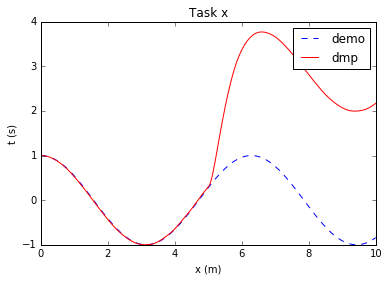

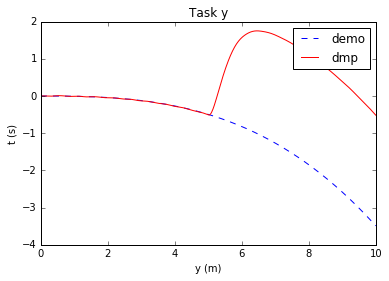

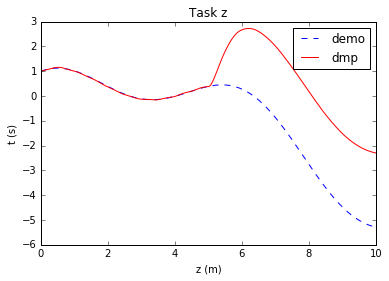

In [11]:
# Set your desired duration
des_tau = duration 

# Set your initial and goal parameters 
x0 = dataset[ 0,1:]   
g0 = dataset[-1,1:] 

# Set force feedback to zero for this example
zeta = 0

# Set delta time for numerical differentiation 
dt = duration/data_length

# Initialize current position and velocities ( e.g. move the arm to the initial position )
current_pos = x0 
current_vel = np.zeros(DoF)  # Initially the robot arm is at rest


plot_position = np.zeros(3)
t = 0 
i = 0
while t <= des_tau : 

    # Execute  DMP
    desired_pos, desired_vel  = dmp.executeDMP(t, dt, des_tau, x0, g0, current_pos,current_vel,zeta)
    
    # Execute the robot arm to the desired position with desired velocities
    current_pos = desired_pos
    current_vel = desired_vel
    
    # Perturbation
    if 5<=t :
        g0 = dataset[-1,1:] + np.ones(3)*3 # At t=5s, increase goal 3 meters for each DoF
        
    # Store the current positions
    plot_position = np.row_stack((plot_position, current_pos))

    i += 1
    t += dt


# If des_tau changed, plotting time may change
plot_time = np.linspace(0,des_tau, i) 

taskNames = ["Task x", "Task y", 'Task z']
DoF_names = ["x", "y", "z"]
for i in range(DoF):
    plt.figure(taskNames[i])
    plt.plot(time,dataset[:,i+1],linestyle='--',label = "demo")
    plt.plot(plot_time,plot_position[1:,i],color = 'r', label = 'dmp')
    plt.title(taskNames[i])
    plt.xlabel(DoF_names[i]+" (m)")
    plt.ylabel("t (s)")
    plt.legend()
plt.show()

## Example 6 : Hold current position in the middle of execution - robustness to perturbations

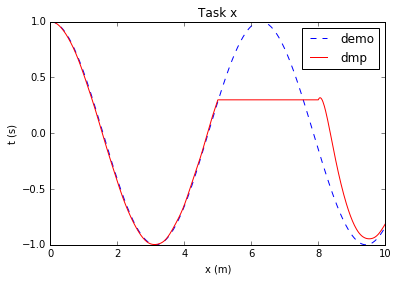

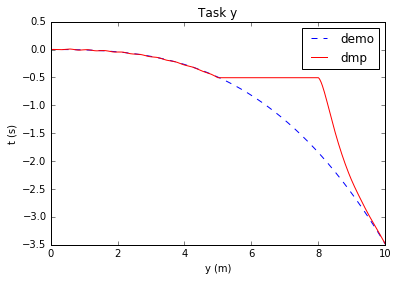

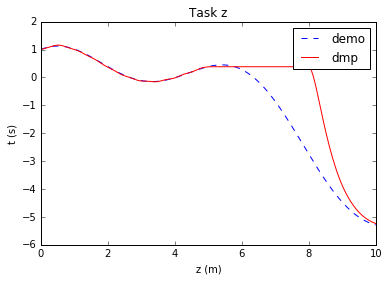

In [12]:
# Set your desired duration
des_tau = duration 

# Set your initial and goal parameters 
x0 = dataset[ 0,1:]   
g0 = dataset[-1,1:] 

# Set force feedback to zero for this example
zeta = 0

# Set delta time for numerical differentiation 
dt = duration/data_length

# Initialize current position and velocities ( e.g. move the arm to the initial position )
current_pos = x0 
current_vel = np.zeros(DoF)  # Initially the robot arm is at rest


plot_position = np.zeros(3)
t = 0 
i = 0
while t <= des_tau : 

    # Execute  DMP
    desired_pos, desired_vel  = dmp.executeDMP(t, dt, des_tau, x0, g0, current_pos,current_vel,zeta)
    
    # Perturbation
    if 5<=t <8: # Hold  current position for 3 seconds
        pass
    else:
        # Execute the robot arm to the desired position with desired velocities
        current_pos = desired_pos
        current_vel = desired_vel
        
    # Store the current positions
    plot_position = np.row_stack((plot_position, current_pos))

    i += 1
    t += dt


# If des_tau changed, plotting time may change
plot_time = np.linspace(0,des_tau, i) 

taskNames = ["Task x", "Task y", 'Task z']
DoF_names = ["x", "y", "z"]
for i in range(DoF):
    plt.figure(taskNames[i])
    plt.plot(time,dataset[:,i+1],linestyle='--',label = "demo")
    plt.plot(plot_time,plot_position[1:,i],color = 'r', label = 'dmp')
    plt.title(taskNames[i])
    plt.xlabel(DoF_names[i]+" (m)")
    plt.ylabel("t (s)")
    plt.legend()
plt.show()